In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import io

In [2]:
###!pip install pycaret

In [3]:
dataset=pd.read_csv('x_final_csv.csv')
dataset

,Standard Error,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Condition
0,0.142599,365.0,366,1.425985,2.033434,-0.897223,-0.105681,6,362,368,36513,Good
1,0.126027,368.0,368,1.260271,1.588283,-0.395387,0.265678,5,366,371,36826,Good
2,0.097333,371.0,371,0.973331,0.947374,-0.400559,-0.177908,4,369,373,37089,Good
3,0.099372,373.0,373,0.993718,0.987475,-0.824843,0.072199,4,371,375,37332,Good
4,0.094554,376.0,376,0.945537,0.894040,-0.187940,-0.205709,5,373,378,37557,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.069559,325.0,330,10.695586,114.395556,0.435310,-0.668873,54,290,344,32322,Crater wear
296,1.131819,324.5,327,11.318190,128.101414,-0.008641,-0.555331,53,291,344,32314,Crater wear
297,1.137146,316.5,316,11.371464,129.310202,-0.046520,-0.069875,56,285,341,31677,Crater wear
298,1.971869,344.5,346,19.718688,388.826667,-0.073315,-1.185157,74,283,357,33304,Crater wear


In [4]:
x=dataset.iloc[:,0:11]
y=dataset.iloc[:,11]
print(x)
print(y)

     Standard Error  Median  Mode  Standard Deviation  Sample Variance  \
0          0.142599   365.0   366            1.425985         2.033434   
1          0.126027   368.0   368            1.260271         1.588283   
2          0.097333   371.0   371            0.973331         0.947374   
3          0.099372   373.0   373            0.993718         0.987475   
4          0.094554   376.0   376            0.945537         0.894040   
..              ...     ...   ...                 ...              ...   
295        1.069559   325.0   330           10.695586       114.395556   
296        1.131819   324.5   327           11.318190       128.101414   
297        1.137146   316.5   316           11.371464       129.310202   
298        1.971869   344.5   346           19.718688       388.826667   
299        0.961634   347.5   348            3.846535        14.795833   

     Kurtosis  Skewness  Range  Minimum  Maximum    Sum  
0   -0.897223 -0.105681      6      362      368  365

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y1=encoder.fit_transform(y)
print(y1.shape)
print(y1)

(300,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [6]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x=sc.fit_transform(x)

In [7]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(210, 11)
(210,)
(90, 11)
(90,)


In [8]:
from sklearn import svm 
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.73      0.79      0.76        14
           2       1.00      0.77      0.87        13
           3       0.82      0.93      0.87        15
           4       0.82      1.00      0.90        14
           5       1.00      0.90      0.95        20

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.88      0.87      0.87        90



In [9]:
import tensorflow as tf

Text(69.0, 0.5, 'Truth')

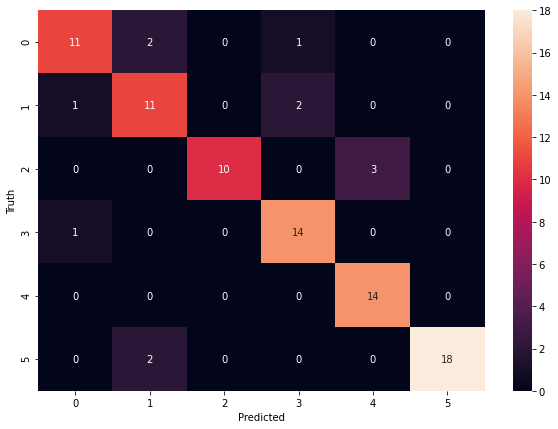

In [10]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test,y_pred)

0.8666666666666667

In [12]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(classifier, files)

In [13]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [14]:
import tkinter as tk 
from tkinter import *
import requests

#root = tk.Tk()


In [15]:
def predict():
    Standard_Error = inp1.get()
    Median = inp2.get()
    Mode= inp3.get()
    Standard_Deviation = inp4.get()
    Sample_Variance = inp5.get()
    Kurtosis = inp6.get()
    Skewness = inp7.get()
    Range = inp8.get()
    Minimum = inp9.get()
    Maximum = inp10.get()
    Sum = inp11.get()
    try:
        Standard_Error = Standard_Error
        Median = Median
        Mode = Mode
        Standard_Deviation = Standard_Deviation
        Sample_Variance = Sample_Variance
        Kurtosis = Kurtosis
        Skewness = Skewness
        Range = Range
        Minimum = Minimum
        Maximum = Maximum
        Sum = Sum
        
        dc = {'Standard Error':[Standard_Error],
              'Median':[Median],
              'Mode':[Mode],
              'Standard Deviation':[Standard_Deviation],
              'Sample Variance':[Sample_Variance],
              'Kurtosis':[Kurtosis],
              'Skewness':[Skewness],
              'Range':[Range],
              'Minimum':[Minimum],
              'Maximum':[Maximum],
              'Sum':[Sum]}
        test=pd.DataFrame.from_dict(dc)
        res = classifier.predict(test)[0]
        print(res)
        if res == 0:
            lbl12['text'] = 'Crater wear'
        elif res == 1:
              lbl12['text']='Flank Wear'
        elif res == 2:
              lbl12['text']='Good'
        elif res == 3:
              lbl12['text']='Nose Wear'
        elif res == 4:
              lbl12['text']='Notch wear'
        else: 
            lbl12['text'] = 'Tool breakage'
    except ValueError:
        messagebox.showinfo("Alert Message")

In [18]:
wdw = tk.Tk()
wdw.title("Simulation predict!") 
# Standard_Error
inp1 = tk.Entry(wdw)
inp1.insert(0,'')
inp1.grid(row=1,column=1)
lbl1 = tk.Label(wdw, text="Standard_Error: ")
lbl1.grid(row=1,column=0)
#Median
inp2 = tk.Entry(wdw)
inp2.insert(0,'')
inp2.grid(row=2,column=1)
lbl2 = tk.Label(wdw, text="Median: ")
lbl2.grid(row=2,column=0)
#Mode
inp3 = tk.Entry(wdw)
inp3.insert(0,'')
inp3.grid(row=3,column=1)
lbl3 = tk.Label(wdw, text="Mode: ")
lbl3.grid(row=3,column=0)
#Standard_Deviation
inp4 = tk.Entry(wdw)
inp4.insert(0,'')
inp4.grid(row=4,column=1)
lbl4 = tk.Label(wdw, text="Standard_Deviation: ")
lbl4.grid(row=4,column=0)
#Sample_Variance
inp5 = tk.Entry(wdw)
inp5.insert(0,'')
inp5.grid(row=5,column=1)
lbl5 = tk.Label(wdw, text="Sample_Variance: ")
lbl5.grid(row=5,column=0)
#Kurtosis
inp6 = tk.Entry(wdw)
inp6.insert(0,'')
inp6.grid(row=6,column=1)
lbl6 = tk.Label(wdw, text="Kurtosis: ")
lbl6.grid(row=6,column=0)
#Skewness
inp7 = tk.Entry(wdw)
inp7.insert(0,'')
inp7.grid(row=7,column=1)
lbl7 = tk.Label(wdw, text="Skewness: ")
lbl7.grid(row=7,column=0)
#Range
inp8 = tk.Entry(wdw)
inp8.insert(0,'')
inp8.grid(row=8,column=1)
lbl8 = tk.Label(wdw, text="Range: ")
lbl8.grid(row=8,column=0)
#Minimum
inp9 = tk.Entry(wdw)
inp9.insert(0,'')
inp9.grid(row=9,column=1)
lbl9 = tk.Label(wdw, text="Minimum: ")
lbl9.grid(row=9,column=0)
#Maximum
inp10 = tk.Entry(wdw)
inp10.insert(0,'')
inp10.grid(row=10,column=1)
lbl10 = tk.Label(wdw, text="Maximum: ")
lbl10.grid(row=10,column=0)
#Sum
inp11 = tk.Entry(wdw)
inp11.insert(0,'')
inp11.grid(row=11,column=1)
lbl11 = tk.Label(wdw, text="Sum: ")
lbl11.grid(row=11,column=0)

# inp12 = tk.Entry(wdw)
# inp12.insert(0,'')
# inp12.grid(row=12,column=1)
lbl12 = tk.Label(wdw, text="Result ...")
lbl12.grid(row=12,column=0)

btn = tk.Button(wdw, text = "Execute Classificatioin", command=predict)
btn.grid(row=13,columnspan=2)

wdw.mainloop()